In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def weight_init(experts,method=1):
    #add market cap initialization
    if method == 1:
        return np.ones(experts)

def losses(data,time,method=1):
    if method == 1: #price relative
        return -1*data.iloc[time]
    elif method==2: #absolute return (close-open)
        return 1
    elif method==3: #beta
        return 1

In [8]:
def mwu(data):
    #data = np.array(data)
    #data is a T by N matrix with each row being the returns of each expert i at time t
    T = len(data)
    N = len(data.columns)
    epsilon = np.sqrt(np.log(N)/T) # is this correct
    #find bounds for loss
    #M = 1 #max(np.max(data.values),-1*np.min(data.values))
    w = weight_init(N)
    #iterations
    #print(T,N)
    start = 10000000
    quantities = [(w*start)/opening_prices]
    weights = []
    values =[start]
    transaction = []
    
    for t in range(1,T+1):
        #starting quantities
        quantities.append((w*start)/opening_prices)
        #portfolio value
        values.append(sum(opening_prices*quantities[t-1]))
        #losses
        M = max(abs(loss))
        loss = losses(data,t)/M #positive return is negative loss to increase weight
        
        #check sum of weight updates
        money_moved = sum([-w[i]*epsilon*loss[i]/M])*port_value
        
        if values[t]-values[t-1] >= 0.015*money_moved:
            for i in range(N):
                w[i] = w[i]*(1-epsilon*loss[i]/M) - w[i]
            transaction.append(0.015*money_moved)
        
    p = w/sum(w)
    return p

In [9]:
data = pd.read_excel('trading_data.xlsx')
data

,XOM,SBUX,AAPL,GOOG,PYPL,FB,NFLX,SQ,MSFT,IBM,...,ICE,SO,PBR,RUN,MRO,PFE,ANTM,CI,HUM,JNJ
2019-11-05,0.014575,-0.005465,0.000311,-0.000665,-0.019990,-0.005374,-0.006759,-0.023040,-0.003518,0.000653,...,-0.017688,-0.001952,0.007389,-0.001336,-0.000791,-0.014462,-0.003140,-0.011685,-0.014214,-0.000843
2019-11-04,0.022834,-0.011164,0.000661,0.011689,-0.027526,0.000874,0.016875,-0.014534,-0.001933,0.010496,...,-0.021886,-0.009466,-0.005461,-0.056013,0.016234,-0.017567,-0.002496,0.009983,0.000977,-0.011912
2019-11-01,0.017693,-0.018634,0.025166,0.006909,0.002674,0.003993,-0.006547,0.016729,-0.003743,0.007658,...,-0.021171,-0.009703,-0.000608,-0.002559,0.034335,-0.007754,0.005310,0.001674,0.002301,-0.006437
2019-10-31,0.001631,-0.024795,0.006148,-0.000928,-0.022260,-0.025674,-0.012337,-0.009194,-0.010559,-0.010214,...,0.005008,0.001438,0.001851,-0.020794,0.000868,-0.000521,-0.012405,0.001178,0.002248,-0.002568
2019-10-30,-0.009507,-0.004964,-0.006128,0.006640,0.011492,-0.006911,0.025005,-0.005599,0.007595,0.010610,...,0.018806,0.026553,0.019460,-0.005643,-0.042254,0.001822,0.006144,-0.000623,-0.008426,-0.003451
2019-10-29,-0.000584,0.003818,-0.022814,-0.010664,-0.017222,-0.012416,-0.002342,-0.006210,-0.008676,-0.011815,...,-0.004143,0.000821,0.013266,0.012041,0.018660,0.005526,0.022349,0.019359,0.023243,-0.004472
2019-10-28,-0.011805,-0.010300,0.006588,0.011408,-0.012872,0.011752,0.013703,-0.000318,-0.001454,-0.000221,...,-0.008551,-0.001310,0.005025,0.027868,-0.009129,0.011394,0.011602,0.018115,0.003886,0.004354
2019-10-25,0.005080,0.002043,0.014065,0.011271,0.026134,0.011085,0.022684,0.022934,0.009976,0.009842,...,-0.009372,-0.011122,0.008270,-0.021823,0.005877,0.010165,0.016067,0.008824,0.001808,0.004068
2019-10-24,-0.012436,0.004589,-0.003804,0.000071,-0.010983,0.009533,-0.001141,0.035223,0.003946,-0.005637,...,0.000970,0.000161,-0.028043,-0.024284,-0.014038,-0.009796,-0.020016,-0.015966,-0.013968,-0.022389
2019-10-23,0.011456,-0.018622,0.004461,0.013499,-0.008007,0.022746,0.011975,-0.009168,0.002630,0.006441,...,0.012751,0.008465,0.018967,0.040496,0.025619,0.012669,0.042861,0.015922,0.006381,0.001851


{'XOM': 0.02832, 'SBUX': 0.02887, 'AAPL': 0.02927, 'GOOG': 0.02879, 'PYPL': 0.02869, 'FB': 0.02868, 'NFLX': 0.0283, 'SQ': 0.02947, 'MSFT': 0.02843, 'IBM': 0.02836, 'MCD': 0.02853, 'AMZN': 0.0278, 'NKE': 0.02857, 'TSLA': 0.02875, 'EL': 0.02869, 'CSCO': 0.02846, 'WMT': 0.02926, 'KO': 0.02874, 'PM': 0.02861, 'PG': 0.0291, 'PEP': 0.02866, 'GS': 0.0281, 'BAC': 0.0283, 'JPM': 0.02873, 'BLK': 0.0281, 'ICE': 0.0285, 'SO': 0.02948, 'PBR': 0.02734, 'RUN': 0.02951, 'MRO': 0.02676, 'PFE': 0.02853, 'ANTM': 0.02905, 'CI': 0.02834, 'HUM': 0.02847, 'JNJ': 0.02845}


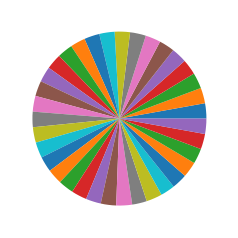

In [10]:
x=mwu(data)
out_dict = {data.columns[i]:round(x[i],5) for i in range(len(data.columns))}
plt.pie(x)
print(out_dict)